## ***ANALSING ADULT DATASET FOR LOGISTIC REGRESSION***

### **Goal : | Prediction task is to determine whether a person makes over 50K a year.**

### Participants : 
    *TAMWO FEUWO FRANCK VALERE 20U2837
    * NGASSEU NDIFO LYSE PRISCILLE 20U2836
    * BAHAOUDDYN 19M2565
    * NCHOURUPOUO MOHANED 20U2593

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [188]:
data = pd.read_csv('https://docs.google.com/uc?export=download&id=1HvxTxffeE4RXhEFBje-DcNrblQKyOzIK')

## DESCRIPTION DU JEU DE DONNES  : Adult.data

### Le dataset que nous allons utiliser dans cet exercice est un dataset nomme "adult " . L'objectif ici est de predire
### si le revenu d'une personne par an est superieur ou inferieur a 50 000$ par  an .


### Informations sur les Attributs

- âge : continu 
-  classe de travail : Privé, Auto-emploi-pas-inc, Auto-emploi-inc, Fédéral-gouvernement, Local-gouvernement, État-gouvernement, Sans salaire, N'a jamais travaillé.
- fnlwgt : continu.
- Scolarité : Licence, Some-collège, 11ème, HS-grad, Prof-école, Assoc-acdm, Assoc-voc, 9ème, 7ème-8ème, 12ème, Master, 1ère-4ème, 10ème,        Doctorat, 5ème-6ème, Préscolaire.
- education-num : continu.
- état civil : Marié-civ-conjoint, Divorcé, Célibataire, Séparé, Veuf, Marié-conjoint-absent, Marié-AF-conjoint.
- Occupation : Support technique, Artisanat-réparation, Autre service, Ventes, Cadre de direction, Prof-spécialité, Manutentionnaires-nettoyeurs, Machine-op-inspct, Adm-clerical, Agriculture-pêche, Transport-déménagement, Priv-house- serv, Protecteur-serv, Armed-Forces.
- relation : Épouse, Propre enfant, Époux, Hors famille, Autre parent, Célibataire.
- race : Blanc, Asiatique-Pac-Insulaire, Amer-Indien-Esquimau, Autre, Noir.       
- sexe : Féminin, Masculin.
- plus-value : continue.
- moins-value : continue.
- heures par semaine : en continu.
- pays d'origine : États-Unis, Cambodge, Angleterre, Porto-Rico, Canada, Allemagne, Outlying-US (Guam-USVI-etc), Inde, Japon, Grèce, Sud, Chine, Cuba, Iran, Honduras, Philippines, Italie , Pologne, Jamaïque, Vietnam, Mexique, Portugal, Irlande, France, République-Dominicaine, Laos, Equateur, Taïwan, Haïti, Colombie, Hongrie, Guatemala, Nicaragua, Ecosse, Thaïlande, Yougoslavie, El-Salvador, Trinadad&Tobago, Pérou, Hong , Hollande-Pays-Bas.

### **Preprocessing Data**

### Adding Colnames to the Dataset

In [3]:
columns = [
'age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country','target']

In [4]:
data.columns=columns

In [5]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
data.to_csv('adult.csv')
data.shape

(32560, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  target          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Les donnees ne presentent pas de valeurs a NULL

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
def check_categorical_var_unique_value(data,*args):
    """"
    Cette fonction recupere chaque attribut categorielle du jeu de donnees passe en parametre  et met en sortie
    ses  differents niveaux et le nombre d'occurence par niveau
    """
    data = data.loc[:,data.dtypes == 'object']
    colnames = list(data.columns)
    unique_cate_values = {col:list(data[col].unique())for col in colnames}
    total_number_item_per_category = {col:data[col].value_counts() for col in colnames}
    return(unique_cate_values,total_number_item_per_category)

In [10]:
unique_level_from_cat_var , total_per_cat_level = check_categorical_var_unique_value(data)

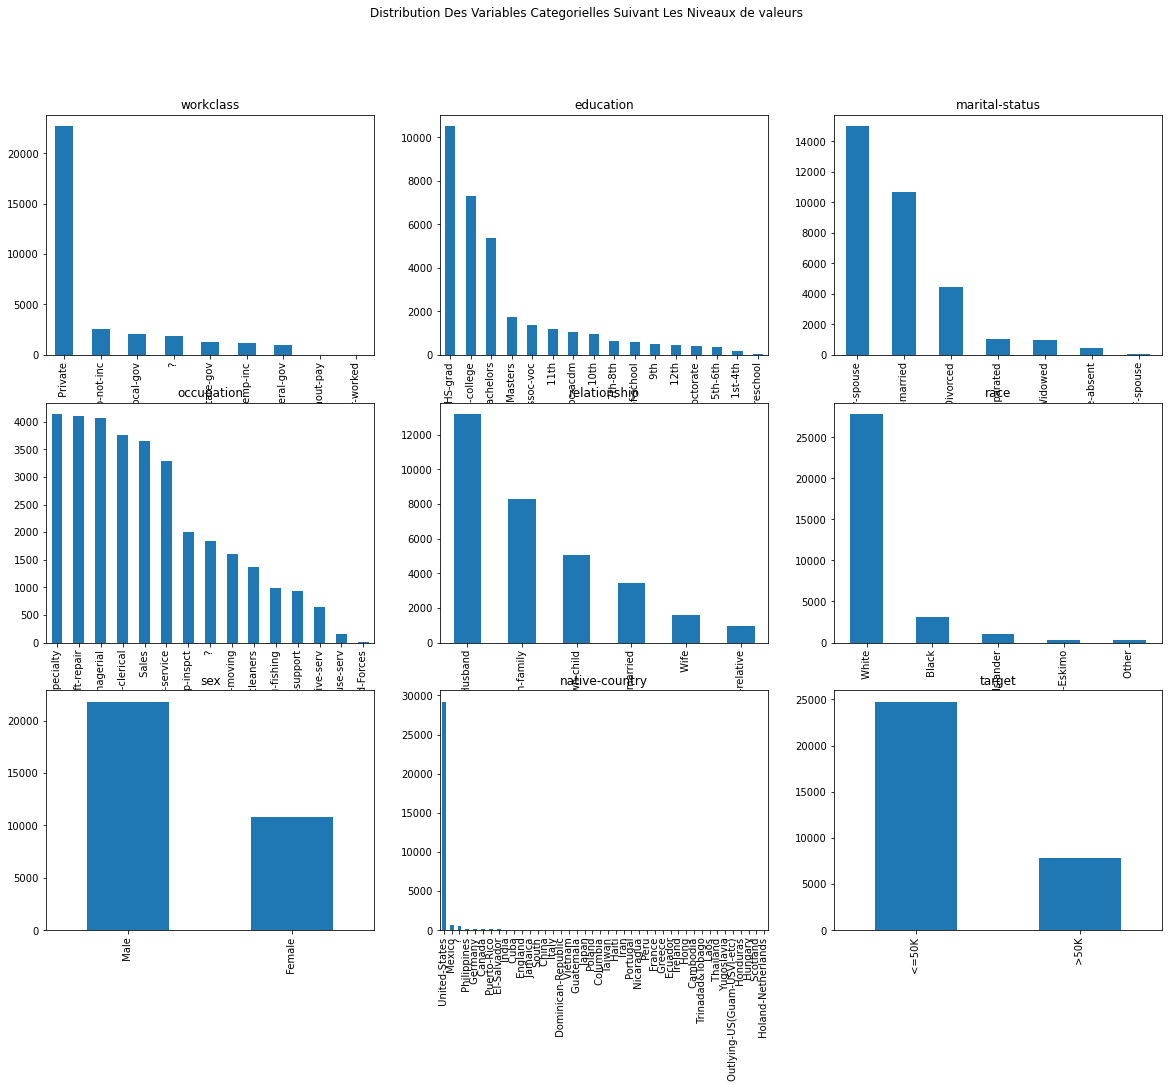

In [11]:
"""
    le Diagramme a bar pour  repartition des differentes niveau de variables Categorielles
"""
fig , axes = plt.subplots(3,3,figsize=(20,15))
k=0
cat_col = list(unique_level_from_cat_var.keys())
for i in range(3):
    for j in range(3):
        total_per_cat_level[cat_col[k]].plot(kind='bar',ax=axes[i,j])    
        axes[i,j].set_title(cat_col[k])
        k+=1
plt.suptitle('Distribution Des Variables Categorielles Suivant Les Niveaux de valeurs')
fig.savefig('cat_distribution.png')

## Cette figure represente la  distribution des variables categorielles suivant les niveaux de valeurs .

### On constate que :
* les personnes touchant un revenu de moins de 50k sont plus nombreux 
* Plus de personnes sont maries en union legal 
* On remarque une distribution tres desequilibree pour les races , avec la race **Blanche** qui domine
* les donnees ont principalement ete recueillis aux Etats Unis
* le secteur du privee est le plus rencontree parmis

### ***Quel est principalemenent le pays des personnes ayant un salaire inferieure a 50k l'annee ?***
### ***Quel lien existe -il entre le niveau d'education et le status maretal?***
### ***Quel lien existe -il entre l'oreilles  et le status maretal?***
### **Quel es le principal secteur d'activite qui paye le plus?**

<AxesSubplot:>

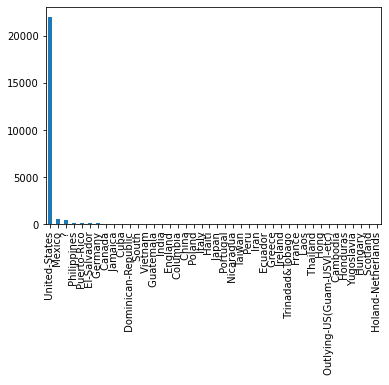

In [12]:
"""
country_name vs target <=50k

"""
country_target_inf_50 = data[data['target']==f"{data['target'][0]}"]
country_target_inf_50['native-country'].value_counts().plot(kind='bar')

## le pays ou le salaire annuel n'atteint pas majoritairement 50k est : **United-States**

<AxesSubplot:>

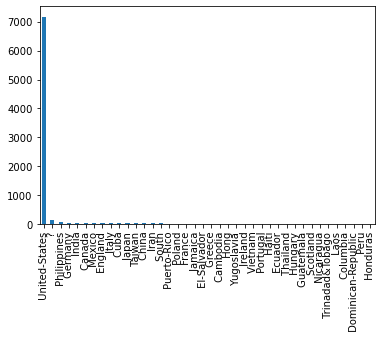

In [13]:
country_target_sup_50 = data[data['target']==f"{data['target'][6]}"]
country_target_sup_50['native-country'].value_counts().plot(kind='bar')

#### ***Quel lien existe -il entre le niveau d'education et le status maretal?***

In [14]:
education_maretal = data.groupby('marital-status')['education'].value_counts().sort_values(ascending=False)
education_maretal

marital-status       education    
 Married-civ-spouse   HS-grad         4845
 Never-married        HS-grad         3089
                      Some-college    2933
 Married-civ-spouse   Some-college    2818
                      Bachelors       2768
                                      ... 
 Widowed              Preschool          3
 Married-AF-spouse    Assoc-acdm         2
 Separated            Preschool          1
 Married-AF-spouse    Assoc-voc          1
 Divorced             Preschool          1
Name: education, Length: 101, dtype: int64

## ***Distribution des variables Numeriques***

In [15]:
 num_data = data.loc[:,np.logical_or(data.dtypes == 'int64',data.dtypes == 'float64')]

In [17]:
num_data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


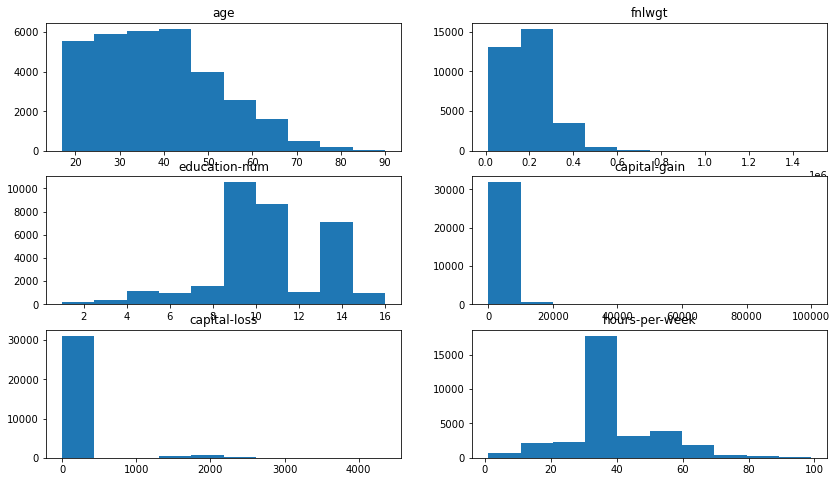

In [19]:
fig,ax=plt.subplots(3,2,figsize=(14,8))
k=0
for i in range(3):
     for j in range(2):
        ax[i,j].hist(num_data[num_data.columns[k]])
        ax[i,j].set_title(num_data.columns[k])
        k=k+1
fig.savefig('num_dis.png')

## Observations : 
## * La colonne ***Capital-loss*** a enormement de values a 0 , donc elle sera supprime , pareil pour ***capital-gain***
## les donnees ne suivent pas de distribution connue  (Uniforme , normal ,....) , elles sont desequilibrees

In [29]:
# data = data.drop(['capital-loss','capital-gain'] , axis=1)
# num_data = num_data.drop(['capital-loss','capital-gain'] , axis=1)

In [34]:
# num_data = num_data.drop(['capital-loss','capital-gain'] , axis=1)

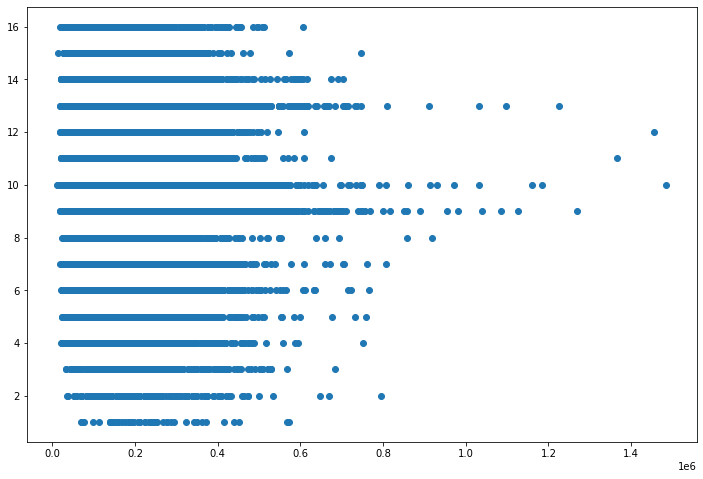

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(num_data['fnlwgt'],num_data['education-num'])
# ax.scatter(num_data['age'],num_data['fnlwgt'] ,sharey=True)

## Transformation  Des  Variables  Categorielles  

### ***la transformation ici consiste a creer de nouvelles variables explicatives en se basant les differents niveau de chaque categories***

In [46]:
data = pd.get_dummies(data,columns=[col for col in cat_col if col !='target' ])

In [167]:
# data = data.drop('workclass_ ?',axis=1)
data

,age,fnlwgt,education-num,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Transformation de la variable ***Target*** pour les niveaux 
* 1 : ">50K" 
* 0 : "<=50K"

In [168]:
# data['target'] = data['target'].apply(lambda x : x.replace(x,0) if x==data['target'][0] else x.replace(x,1))
data.loc[data['target']==data['target'][0],'target']=0
data.loc[data['target']==data['target'][6],'target']=1

In [169]:
# data['target'] = data['target'].apply(lambda x :x.astype(int))

In [170]:
data['target']=data['target'].astype(int)

## Importation des  librairies de Travail

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

## Transformation  Des  Variables  Numeriques  

In [172]:
data_train , data_test = train_test_split(data,test_size=0.2,random_state=886,stratify=data['target'])

In [173]:
scaler = StandardScaler()
scaler.fit(data_train[num_data.columns])

StandardScaler()

In [174]:
"""
On ecrit une fonction qui prend en parametre  le dataset le nom des colonnes categorielles et Numerique , et la fonction
permettant de ramener les donnees numeriques entre -1 et 1 
"""

'\nOn ecrit une fonction qui prend en parametre  le dataset le nom des colonnes categorielles et Numerique , et la fonction\npermettant de ramener les donnees numeriques entre -1 et 1 \n'

In [175]:
def Obtain_feature_and_target(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

In [176]:
cat_col = [col for col in cat_col if col!='target']
data_cat =list(set(data.columns)-set(num_data.columns)-{'target'})


In [177]:
Feature, targeT = Obtain_feature_and_target(data_train, num_data.columns, data_cat, scaler)

In [178]:
Feature

array([[ 0.        ,  0.        ,  0.        , ...,  0.26365769,
        -0.42207371, -0.03681655],
       [ 0.        ,  0.        ,  0.        , ..., -0.63015044,
         1.13451357, -0.03681655],
       [ 0.        ,  0.        ,  0.        , ..., -0.86310573,
        -1.97866098, -0.03681655],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.23375007,
        -0.42207371, -0.03681655],
       [ 0.        ,  0.        ,  0.        , ..., -0.91114081,
         0.35621993,  0.28859827],
       [ 0.        ,  0.        ,  0.        , ..., -0.14003585,
        -0.42207371, -0.03681655]])

## ***Entrainement du model de Regression Logistique***

### la variable cible etant Binaire et la majorite des attributs categorielles , il est logique de penser a un modele de regression logistique  

In [179]:
model = LogisticRegression(penalty='none')
model = model.fit(Feature,targeT)

/home/valere/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [180]:
model

LogisticRegression(penalty='none')

## **Evaluation du Modele** 

In [181]:
X_test, y_test = Obtain_feature_and_target(data_test,num_data.columns, data_cat, scaler)

## Courbe Roc

/home/valere/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


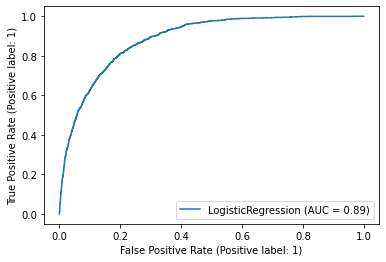

In [182]:
plot_roc_curve(model,X_test,y_test)

In [183]:
test_prob = model.predict_proba(X_test)[:, 1]
test_pred = model.predict(X_test)

In [184]:
test_pred

array([1, 1, 1, ..., 0, 0, 0])

### Precision

In [185]:
precision_score(y_test,test_pred)

0.7014446227929374

## Rappel 

In [186]:
recall_score(y_test,test_pred)

0.5573979591836735

## ***le modele a une precision de 70,13% et un rappel de 55.86%***
